# Data analysis of extracted data

Necessary imports. Snippet class must be loaded into program for unpickling

In [1]:
import matplotlib.pyplot as plt
from json import dump, load
from dataset_extraction.config.vars import OPT_LEVELS, METHODS

Data is then loaded

In [2]:
path = "dataset_extraction/"
with open(path+"data/train.json", "rb") as train_file:
  train_seqs = load(train_file)
with open(path+"data/val.json", "rb") as val_file:
  val_seqs = load(val_file)
with open(path+"data/test.json", "rb") as val_file:
  test_seqs = load(val_file)


In [3]:
print(len(train_seqs), len(val_seqs), len(test_seqs))
whole_dataset = train_seqs+val_seqs+test_seqs
print(len(whole_dataset))

19685 4929 6157
30771


In [4]:
test = whole_dataset[0]
print(test)

{'binary': 'louvain', 'opt': '-O2', 'method': 'std::vector::clear', 'blocks': [{'address': 36672, 'node_type': 'Initial', 'instructions': ['endbr64 ', 'push rbx', 'lea rax, [rip + 0xbb5c]', 'mov rbx, rdi', 'mov qword ptr [rdi], rax', 'mov rdi, qword ptr [rdi + 0x38]', 'cmp rdi, qword ptr [rbx + 0x40]', 'je 0x408f60'], 'inline_flags': [False, False, False, False, False, True, True, True]}, {'address': 36700, 'node_type': 'Final', 'instructions': ['mov qword ptr [rbx + 0x40], rdi'], 'inline_flags': [True]}]}


## Visualize dataset size and distribution across optimization levels

Count the occurrence of each optimization level

In [5]:
opt_count = {o : 0 for o in OPT_LEVELS}
    
for instance in whole_dataset:
    opt_count[instance['opt']] +=1
opt_perc = {key : opt_count[key]/len(whole_dataset) for key in opt_count}

print(opt_count)
print(opt_perc)


{'-O2': 12166, '-O3': 13038, '-Os': 5567}
{'-O2': 0.39537226609469955, '-O3': 0.4237106366383933, '-Os': 0.18091709726690716}


Create bar plot

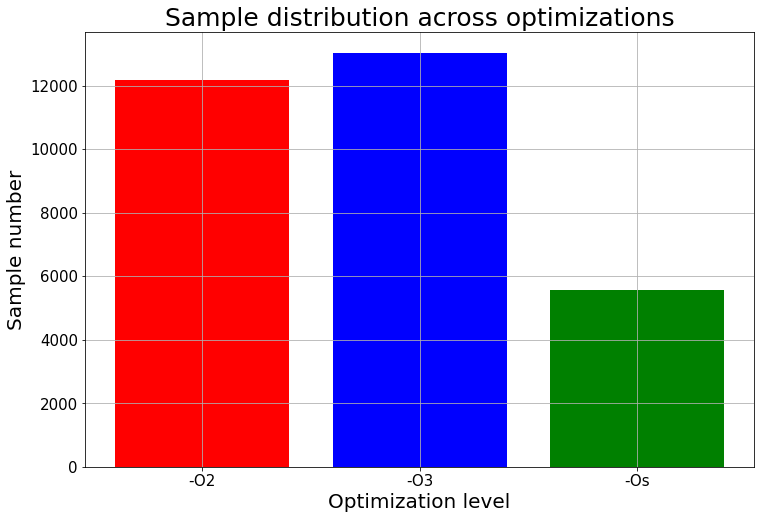

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

x = sorted(opt_count.keys())
y = [opt_count[k] for k in x]
colors = ["red", "blue", "green", "yellow"]
ax.bar(x, y, color=colors)
ax.set_xlabel("Optimization level", fontsize=20)
ax.set_ylabel("Sample number", fontsize=20)
ax.set_title("Sample distribution across optimizations", fontsize=25)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=15)

## Visualize distribution across methods

Count the occurrence of each method, and plot it

In [6]:
methods_count = {m : 0 for m in METHODS}

for seq in whole_dataset:
    methods_count[seq['method']] += 1
    

methods_perc = {key : methods_count[key]/len(whole_dataset) for key in methods_count}

for key in 
print(methods_perc)

SyntaxError: invalid syntax (3929610943.py, line 9)

NameError: name 'methods_count' is not defined

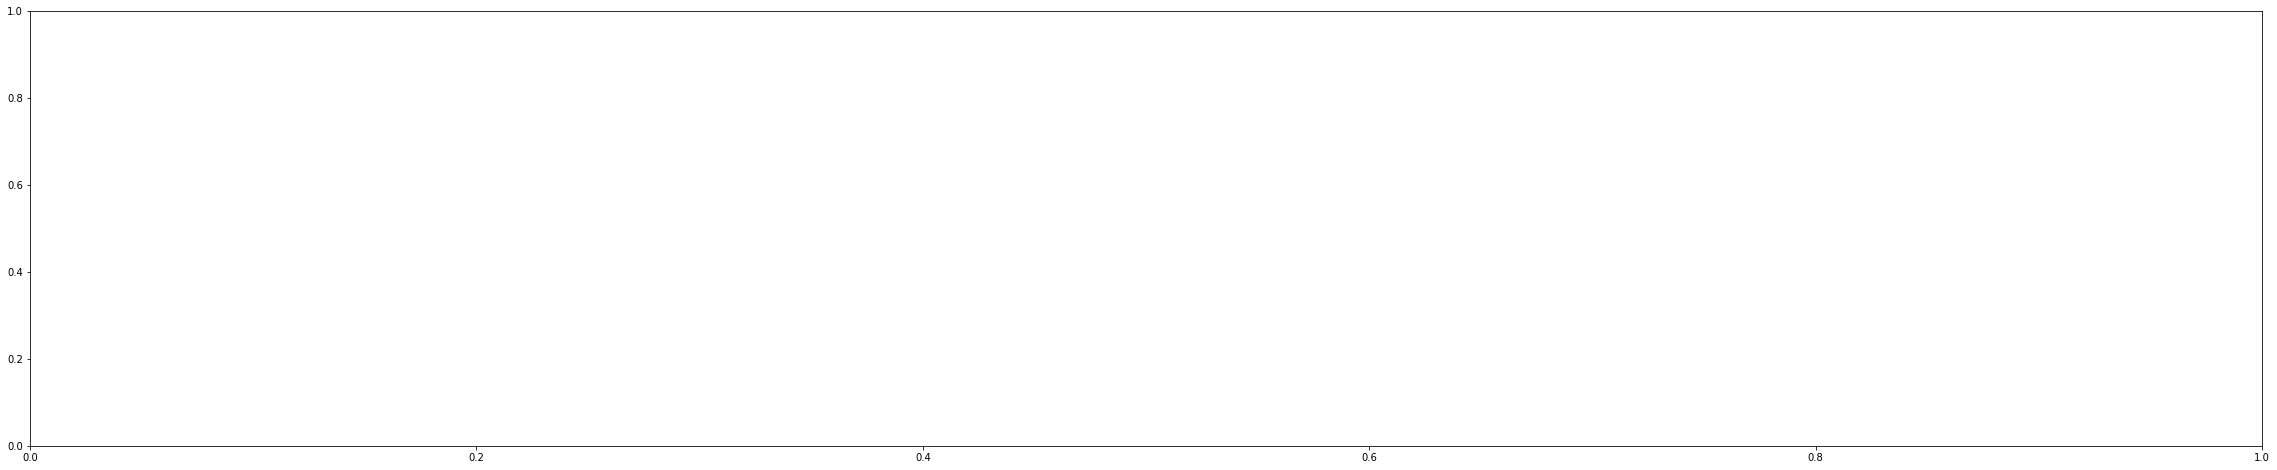

In [7]:
fig, ax = plt.subplots(figsize=(40,8))

x = [k[5:] for k in sorted(methods_count.keys())]
y = [methods_count[k] for k in sorted(methods_count.keys())]
colors = ["red", "blue", "green", "yellow"]
ax.bar(x, y, color=colors)
ax.set_xlabel("Template methods", fontsize=35)
ax.set_ylabel("Sample number", fontsize=35)
ax.set_title("Sample distribution across methods", fontsize=45)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=18)

## Visualize length distribution of snippets across optimization levels and methods

For both length of snippets and number of basic blocks, create a grid of plots

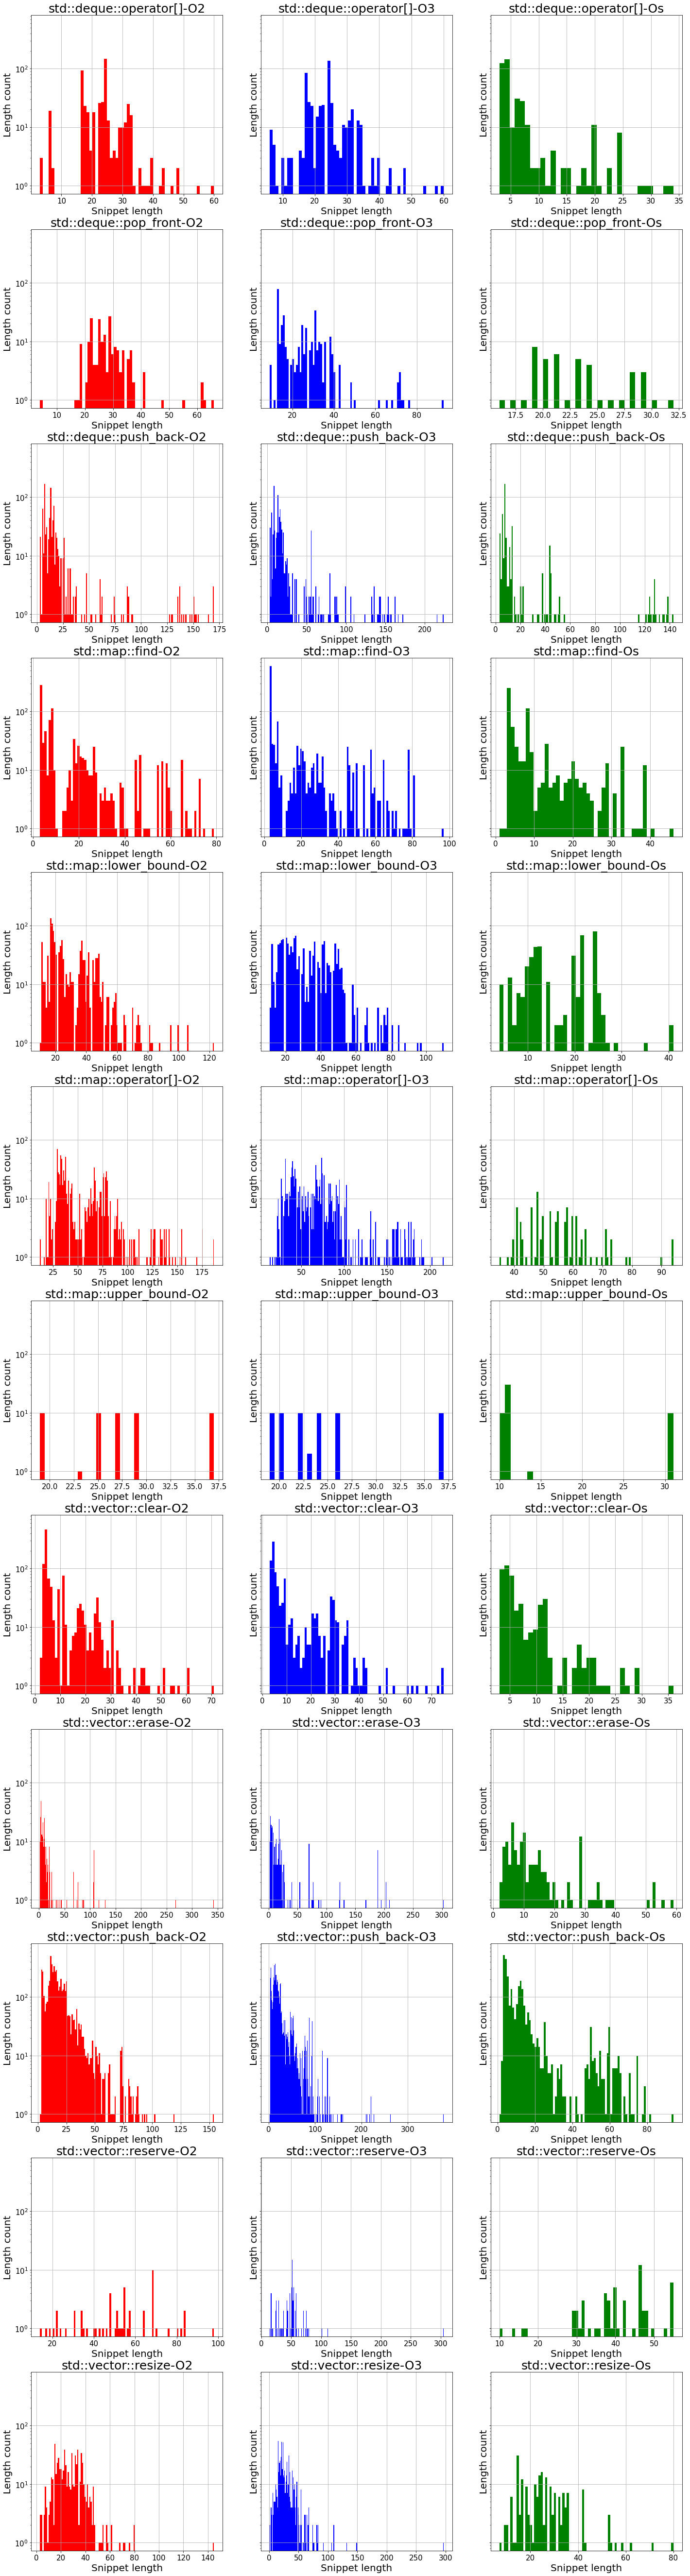

In [8]:
def get_instructions(seq):
    inst = []
    for block in seq['blocks']:
        inst.extend(block['instructions'])
    return inst

def get_inline_flags(seq):
    flags = []
    for block in seq['blocks']:
        flags.extend(block['inline_flags'])
    return flags

numopt = len(OPT_LEVELS)
methods = sorted(list(METHODS))
nummethods = len(methods)


fig, axs = plt.subplots(nummethods, numopt, figsize=(8*numopt, 8*nummethods), sharey=True)

colors = ["red", "blue", "green", "yellow"]
for j in range(nummethods):
    for i in range(numopt):
        len_list = [len(get_instructions(seq)) for seq in whole_dataset if (seq['opt'] == OPT_LEVELS[i] and seq['method'] == methods[j])]
      
        if not len_list: 
            print(methods[j])
            continue
        ceil = max(len_list)

        axs[j][i].hist(len_list, ceil, log=True, color=colors[i%4])
        axs[j][i].set_xlabel("Snippet length", fontsize=20)
        axs[j][i].set_ylabel("Length count", fontsize=20)
        axs[j][i].set_title(methods[j]+OPT_LEVELS[i], fontsize=25)
        axs[j][i].grid(True)
        axs[j][i].tick_params(axis='both', which='major', labelsize=15)

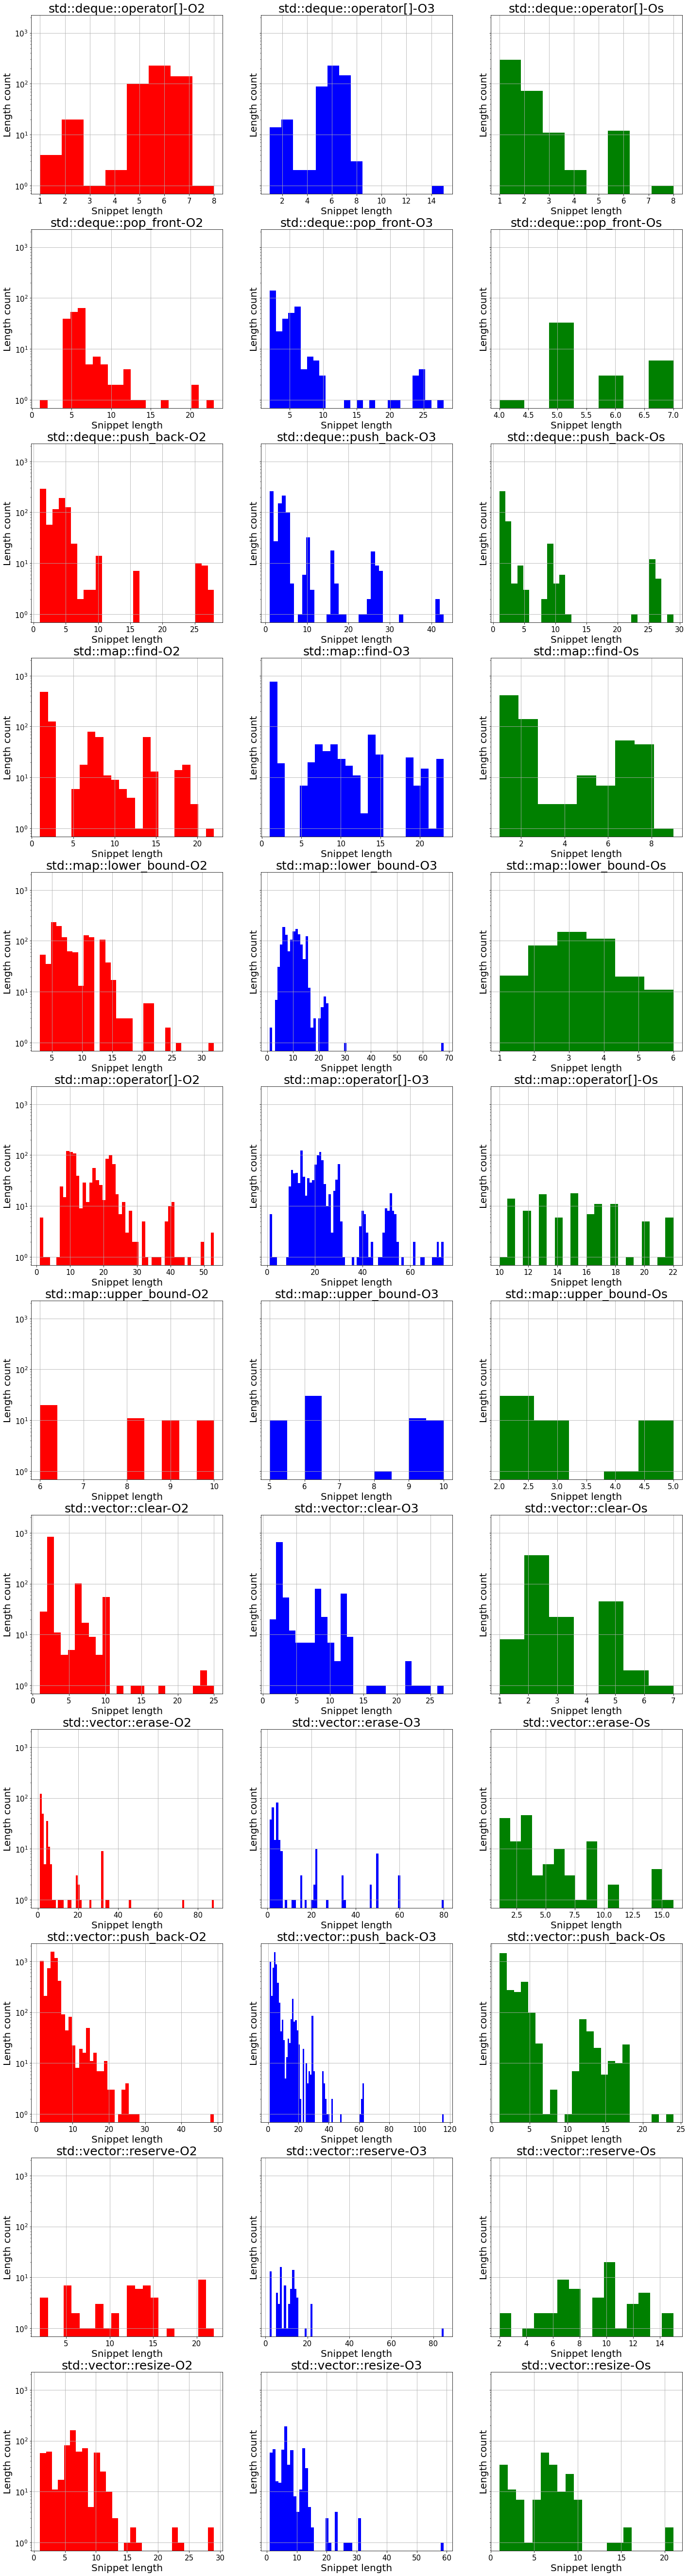

In [9]:
fig, axs = plt.subplots(nummethods, numopt, figsize=(8*numopt, 8*nummethods), sharey=True)

colors = ["red", "blue", "green", "yellow"]
for j in range(nummethods):
    for i in range(numopt):
        len_list = [len(seq['blocks']) for seq in whole_dataset if (seq['opt'] == OPT_LEVELS[i] and seq['method'] == methods[j])]
      
        if not len_list: 
            print(methods[j])
            continue
        ceil = max(len_list)

        axs[j][i].hist(len_list, ceil, log=True, color=colors[i%4])
        axs[j][i].set_xlabel("Snippet length", fontsize=20)
        axs[j][i].set_ylabel("Length count", fontsize=20)
        axs[j][i].set_title(methods[j]+OPT_LEVELS[i], fontsize=25)
        axs[j][i].grid(True)
        axs[j][i].tick_params(axis='both', which='major', labelsize=15)

In [15]:
def ecdf(data, upper_bound, complementary=True):
    max_len = min(max(data), upper_bound)
    res = []
    
    for i in range(max_len+1):
        res.append(len([d for d in data if d > i])/len(data))

    return res

len_list = [len(seq['blocks']) for seq in whole_dataset]
cumulative_dist = ecdf(len_list, 80)

for i in range(0, len(cumulative_dist)):
    print("{}: {:.2%}".format(i, cumulative_dist[i]))

0: 100.00%
1: 78.44%
2: 66.66%
3: 58.69%
4: 44.78%
5: 34.01%
6: 25.95%
7: 22.09%
8: 19.97%
9: 17.79%
10: 15.68%
11: 13.83%
12: 11.77%
13: 10.46%
14: 8.88%
15: 7.69%
16: 6.68%
17: 6.03%
18: 5.40%
19: 4.88%
20: 4.46%
21: 3.70%
22: 2.87%
23: 2.20%
24: 2.01%
25: 1.88%
26: 1.63%
27: 1.50%
28: 1.35%
29: 0.95%
30: 0.71%
31: 0.68%
32: 0.63%
33: 0.62%
34: 0.61%
35: 0.60%
36: 0.57%
37: 0.55%
38: 0.54%
39: 0.51%
40: 0.45%
41: 0.39%
42: 0.36%
43: 0.35%
44: 0.34%
45: 0.34%
46: 0.33%
47: 0.32%
48: 0.32%
49: 0.31%
50: 0.24%
51: 0.22%
52: 0.16%
53: 0.12%
54: 0.10%
55: 0.09%
56: 0.09%
57: 0.09%
58: 0.09%
59: 0.09%
60: 0.08%
61: 0.07%
62: 0.06%
63: 0.05%
64: 0.05%
65: 0.05%
66: 0.04%
67: 0.04%
68: 0.04%
69: 0.04%
70: 0.04%
71: 0.03%
72: 0.03%
73: 0.02%
74: 0.01%
75: 0.01%
76: 0.01%
77: 0.01%
78: 0.01%
79: 0.01%
80: 0.01%


NameError: name 'cumulative_dist' is not defined

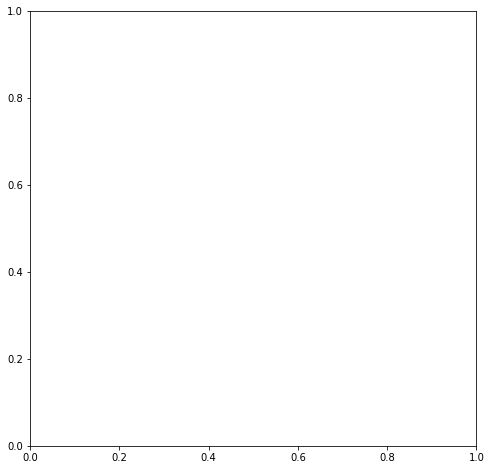

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(cumulative_dist)
ax.grid(True)
ax.set_xlabel("Sequence length", fontsize=15)
ax.set_ylabel("Cumulative probability over sequence length", fontsize=15)
ax.margins(0)
plt.plot()